In [1]:
import numpy as np
import pandas as pd
import timeit

# Please, to run the experiment donwload the following dataset and put it in the /Datasets folder:
# 	- household_power_consumption.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
#       (extract the .txt file)

filename = "Datasets/household_power_consumption.txt"
df = pd.read_csv(filename, sep=';', header=0, usecols=[2,3,4])
df = df.dropna()

print(list(df.columns.values))

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Global_active_power', 'Global_reactive_power', 'Voltage']


In [2]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

df.head()

(2049280, 3)
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
dtype: object


,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29
3,5.388,0.502,233.74
4,3.666,0.528,235.68


In [3]:
x = df[['Global_active_power','Global_reactive_power']]
x = x.to_numpy()
y = df['Voltage']
y = y.to_numpy()
n = x.shape[1]

In [4]:
import recombination as rb

print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(2049280, 2)
(2049280, 9)
(2049280, 6)


In [5]:
mean_t = 0.

time_rand = []
iterations_rand = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                    xy_sq[:,n+1:]-np.mean(xy_sq[:,n+1:],0), 400)
    time_rand.append((timeit.default_timer()-tic)*1000)
    iterations_rand.append(iterations)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHCEK FINISHED
    
    mean_t += time_rand[-1]
    print("sample = ", i)
    print("time = ", time_rand[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_rand)
max_t = max(time_rand)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("---------------------------------------")

sample =  0
time =  110.26325699999973 ms
mean time =  110.26325699999973 ms
sample =  1
time =  658.3927599999981 ms
mean time =  384.32800849999893 ms
ERROR: NO convergence
sample =  2
time =  2177.499791999999 ms
mean time =  982.0519363333324 ms
sample =  3
time =  114.97193099999947 ms
mean time =  765.2819349999992 ms
sample =  4
time =  273.8537650000019 ms
mean time =  666.9963009999998 ms
sample =  5
time =  101.22939300000056 ms
mean time =  572.7018163333332 ms
sample =  6
time =  102.25574700000095 ms
mean time =  505.49523500000004 ms
sample =  7
time =  496.1161109999992 ms
mean time =  504.3228445 ms
sample =  8
time =  374.00645099999963 ms
mean time =  489.8432452222221 ms
sample =  9
time =  687.2080119999993 ms
mean time =  509.5797218999998 ms
sample =  10
time =  101.07066599999825 ms
mean time =  472.4425349999996 ms
sample =  11
time =  271.44693799999686 ms
mean time =  455.69290191666613 ms
sample =  12
time =  101.82601500000033 ms
mean time =  428.47237215384

In [6]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  0
time =  409.2825380000136 ms
mean time =  409.2825380000136 ms
sample =  1
time =  428.3456249999631 ms
mean time =  418.81408149998833 ms
sample =  2
time =  435.1392350000083 ms
mean time =  424.2557993333283 ms
sample =  3
time =  438.77787200000284 ms
mean time =  427.88631749999695 ms
sample =  4
time =  442.8521929999647 ms
mean time =  430.8794925999905 ms
sample =  5
time =  431.57921099998475 ms
mean time =  430.99611233332286 ms
sample =  6
time =  428.5293679999995 ms
mean time =  430.64372028570523 ms
sample =  7
time =  432.1516940000265 ms
mean time =  430.8322169999954 ms
sample =  8
time =  433.531902000027 ms
mean time =  431.1321819999989 ms
sample =  9
time =  428.9059179999981 ms
mean time =  430.90955559999884 ms
sample =  10
time =  432.09326900000633 ms
mean time =  431.0171659090904 ms
sample =  11
time =  429.75825799999257 ms
mean time =  430.9122569166656 ms
sample =  12
time =  429.39318300000195 ms
mean time =  430.79540507692224 ms
sample =  13

In [7]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  539.4222699999887 ms
mean time =  539.4222699999887 ms
sample =  1
time =  505.9832710000478 ms
mean time =  522.7027705000182 ms
sample =  2
time =  510.7268890000114 ms
mean time =  518.710810000016 ms
sample =  3
time =  512.3724929999867 ms
mean time =  517.1262307500086 ms
sample =  4
time =  511.85540900002025 ms
mean time =  516.072066400011 ms
sample =  5
time =  524.2498289999844 ms
mean time =  517.4350268333399 ms
sample =  6
time =  515.9067910000203 ms
mean time =  517.21670742858 ms
sample =  7
time =  512.3087960000134 ms
mean time =  516.6032185000091 ms
sample =  8
time =  517.4671479999802 ms
mean time =  516.6992106666726 ms
sample =  9
time =  513.3612719999974 ms
mean time =  516.365416800005 ms
sample =  10
time =  516.6796859999749 ms
mean time =  516.3939867272751 ms
sample =  11
time =  509.77781800003186 ms
mean time =  515.8426393333381 ms
sample =  12
time =  509.8256609999794 ms
mean time =  515.3797948461566 ms
sample =  13
time =  508.

In [8]:
mean_t = 0.
sample = 1000

time_log = np.zeros(sample)
min_t = 0.
max_t = 0.

COV = np.matmul(x[:,:].T,x[:,:])/N
    
for i in range(sample):
    x_cp = np.copy(xy_sq[:,n+1:])

    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
    time_log[i] = (timeit.default_timer()-tic)*1000

    ################ CHECK
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED

    mean_t += time_log[i]
    print("sample = ", i)
    print("time = ", time_log[i], "ms")
    print("mean time = ", mean_t/(i+1), "ms")
    
mean_t = np.mean(time_log)
min_t = np.min(time_log)
max_t = np.max(time_log)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

sample =  0
time =  171.43478200000573 ms
mean time =  171.43478200000573 ms
sample =  1
time =  138.7556949999862 ms
mean time =  155.09523849999596 ms
sample =  2
time =  147.31336799997052 ms
mean time =  152.50128166665414 ms
sample =  3
time =  147.6110300000073 ms
mean time =  151.27871874999244 ms
sample =  4
time =  150.31572399999504 ms
mean time =  151.08611979999296 ms
sample =  5
time =  146.89937899998995 ms
mean time =  150.38832966665913 ms
sample =  6
time =  152.07461200003536 ms
mean time =  150.62922714285574 ms
sample =  7
time =  148.8629250000031 ms
mean time =  150.40843937499915 ms
sample =  8
time =  149.53116400005229 ms
mean time =  150.31096433333838 ms
sample =  9
time =  143.74186200001304 ms
mean time =  149.65405410000585 ms
sample =  10
time =  150.14256000000614 ms
mean time =  149.6984637272786 ms
sample =  11
time =  143.86721300002137 ms
mean time =  149.21252616667383 ms
sample =  12
time =  153.76592400002664 ms
mean time =  149.56278753847022 ms


In [9]:
time_rand = np.array(time_rand)
iterations_rand = np.array(iterations_rand)
time_FC = np.array(time_FC)
time_log = np.array(time_log)
time_MT = np.array(time_MT)

np.set_printoptions(precision=1)

print("Probability to be faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC))/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC)/4)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand))

print("The expected time of the log-random is ", np.mean(time_log), "ms")

print("Standard deviation of the log-random is  = ", np.std(time_log))

np.set_printoptions(precision=1)
print('''Some statistics for the randomized algorithm are: 
      average running time = ''', np.round(np.mean(time_rand),1),  
      "ms, min = " , np.round(np.min(time_rand),1), "ms, max = ", np.round(np.max(time_rand),1),
      "ms, std ", np.round(np.std(time_rand),1), 
      "ms. Using the log-random strategy they are: average running time = ", np.round(np.mean(time_log),1),
      "ms, min = ", np.round(np.min(time_log),1), "ms, max = ", np.round(np.max(time_log),1),
      ", std = ", np.round(np.std(time_log),1), "ms.",
      " Average runnig times of determinsitic: TL = ", np.round(np.mean(time_MT),1),
      "ms, MJF = ", np.round(np.mean(time_FC),1),"ms.")

Probability to be faster =  84.1 %
Probability to be 4x faster =  53.1 %
Standard deviation =  342.037548192394
The expected time of the log-random is  149.51073416399996 ms
Standard deviation of the log-random is  =  8.181792822191856
Some statistics for the randomized algorithm are: 
      average running time =  300.4 ms, min =  101.1 ms, max =  2913.5 ms, std  342.0 ms. Using the log-random strategy they are: average running time =  149.5 ms, min =  133.0 ms, max =  192.3 , std =  8.2 ms.  Average runnig times of determinsitic: TL =  430.6 ms, MJF =  510.4 ms.


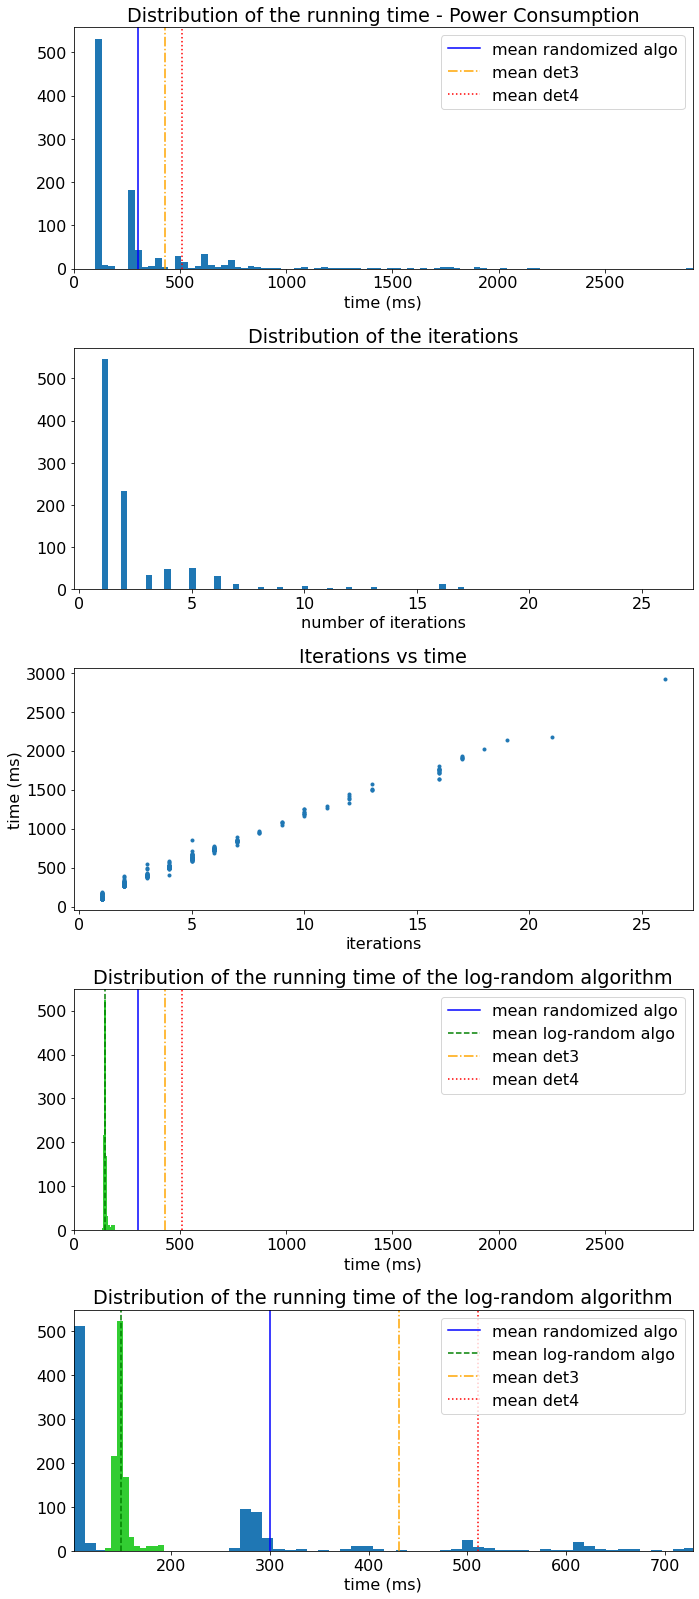

In [13]:
# import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(5,1,figsize=(10,4.5*5))

################################################
plt.subplot(5, 1, 1)

plt.hist(time_rand, bins=int(90))
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle=':', color="red", label="mean det4")

plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time - Power Consumption')
plt.xlabel('time (ms)')

################################################
plt.subplot(5, 1, 2)

plt.hist(iterations_rand, bins=int(90))
plt.title('Distribution of the iterations')
plt.xlabel('number of iterations')
plt.xscale('linear')

################################################
plt.subplot(5, 1, 3)

plt.plot(iterations_rand,time_rand, '.')
plt.xlabel('iterations')
plt.ylabel('time (ms)')
plt.title('Iterations vs time')

################################################
plt.subplot(5, 1, 4)

plt.hist(time_log, bins=int(10),color='limegreen')
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), 0, max(time_log), linestyle='--', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle=':', color="red", label="mean det4")
plt.xlim((0, max(time_rand)))

plt.title('Distribution of the running time of the log-random algorithm')
plt.legend()
plt.xlabel('time (ms)')


################################################
plt.subplot(5, 1, 5)

plt.hist(time_rand, bins=int(250))
plt.hist(time_log, bins=int(10),color='limegreen')
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), 0, max(time_log), linestyle='--', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle=':', color="red", label="mean det4")
plt.xlim((min(time_rand), max(time_rand)/4.))

plt.title('Distribution of the running time of the log-random algorithm')
plt.legend()
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_elec.pdf')#, bbox_inches='tight')
plt.show()

In [11]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

sample =  0
time =  194.58510100002968 ms
mean time =  194.58510100002968 ms
sample =  1
time =  148.68456500005323 ms
mean time =  171.63483300004145 ms
sample =  2
time =  150.73191599992697 ms
mean time =  164.6671940000033 ms
sample =  3
time =  148.00426399995104 ms
mean time =  160.50146149999023 ms
sample =  4
time =  148.5647000000654 ms
mean time =  158.11410920000526 ms
sample =  5
time =  152.25229400004991 ms
mean time =  157.1371400000127 ms
sample =  6
time =  150.93554899999617 ms
mean time =  156.25119842858177 ms
sample =  7
time =  147.62052599996878 ms
mean time =  155.17236437500515 ms
sample =  8
time =  150.36880100001326 ms
mean time =  154.63863511111717 ms
sample =  9
time =  151.5121209999961 ms
mean time =  154.32598370000505 ms
sample =  10
time =  140.08782100006556 ms
mean time =  153.03160527273783 ms
sample =  11
time =  140.63344400005917 ms
mean time =  151.99842516668127 ms
sample =  12
time =  143.75380900003165 ms
mean time =  151.36422392309285 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  82
time =  150.99105199999485 ms
mean time =  153.39729769879696 ms
sample =  83
time =  153.31477399990945 ms
mean time =  153.39631527381022 ms
sample =  84
time =  157.48830500001532 ms
mean time =  153.44445632941262 ms
sample =  85
time =  149.87616899998102 ms
mean time =  153.4029646162797 ms
sample =  86
time =  157.11265300001287 ms
mean time =  153.44560471264444 ms
sample =  87
time =  150.78701599998112 ms
mean time =  153.41539347727328 ms
sample =  88
time =  148.96565900005498 ms
mean time =  153.36539646067533 ms
sample =  89
time =  150.75612099997215 ms
mean time =  153.33640451111197 ms
sample =  90
time =  156.62429099995734 ms
mean time =  153.3725351318685 ms
sample =  91
time =  155.26363100002527 ms
mean time =  153.39309052173977 ms
sample =  92
time =  160.19398000003093 ms
mean time =  153.46621836559237 ms
sample =  93
time =  146.40136700006678 ms
mean time =  153.3910603723421 ms
sample =  94
time =  149.0734579999753 ms
mean time =  153.34561192

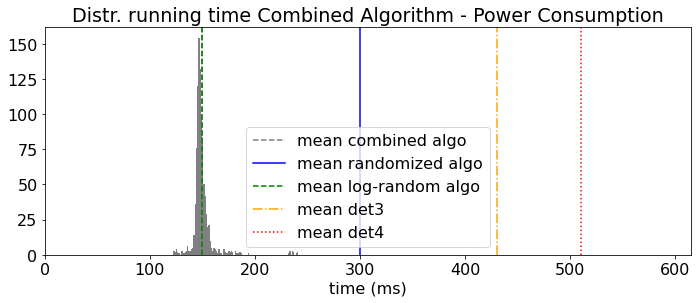

In [16]:
maximum = max(np.mean(time_rand),np.mean(time_log),np.mean(time_MT),np.mean(time_rand),np.mean(time_combined))*2

plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(figsize=(10,4.5))

plt.hist(time_combined,bins=int(100),color='grey')
plt.axvline(np.mean(time_combined), linestyle='--', color="grey", label="mean combined algo")
plt.axvline(np.mean(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='--', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle=':', color="red", label="mean det4")
plt.xlim((0, maximum/1.4))

plt.legend()
plt.title('Distr. running time Combined Algorithm - Power Consumption')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_elec_combined.pdf')#, bbox_inches='tight')
plt.show()